#Problem Statement:



*   It is a critical requirement for business to understand the value derived from a customer.
*  RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
*   Perform customer segmentation using RFM analysis. 
The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).



 
#Dataset Description: 
This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.


*   InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

*  StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.


*   Description: Product (item) name. Nominal.
*   Quantity: The quantities of each product (item) per transaction. Numeric.

*   InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
*   UnitPrice: Unit price. Numeric, Product price per unit in sterling.

* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#reading data from excel file
data = pd.read_excel("/content/train.xlsx")

In [3]:
#number of rows and column
data.shape

(379336, 8)

In [4]:
#Generate descriptive statistics.
data.describe()

,Quantity,UnitPrice,CustomerID
count,379336.000000,379336.000000,285076.000000
mean,9.517272,4.681474,15288.302463
std,259.070548,105.799352,1712.323663
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13958.750000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
#top 5 data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [6]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


# Data Cleaning:


1. Check for missing data and formulate an apt strategy to treat them.
2. Remove duplicate data records.
3. Perform descriptive analytics on the given data.



In [8]:
#checking for null values in the data
data.isna().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [9]:
# Calculating the Missing Values % contribution in data
df_null = round(data.isnull().sum()/len(data)*100,2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.25
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.85
Country         0.00
dtype: float64

Remove rows with null "Customer ID": If the "Customer ID" is a crucial identifier and rows with null values cannot provide meaningful insights or analysis, you can choose to remove those rows from the DataFrame.
choosing "mean/median" will not add any meaning to the data so it is better to drop those rows

In [10]:
#droping the data with null value
data.dropna(subset=['CustomerID'], inplace=True)
print(data.shape)
print(data.isna().sum())

(285076, 8)
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [11]:
#checking for duplicates in the data
print("Number of duplicates =", data.duplicated().sum())

Number of duplicates = 2656


In [12]:
#droping duplicates
data = data.drop_duplicates()
print(data.shape)
print(data.duplicated().sum())

(282420, 8)
0


 **DESCRIPTIVE ANALYSIS:**


involves the summarization, organization, and presentation of data. Its primary purpose is to provide a clear and concise overview of a dataset,  to understand the main characteristics, patterns, and trends within the data.



1.CustomerID

In [13]:
# Convert 'customerID' column to string using .loc
data.loc[:, 'CustomerID'] = data.loc[:, 'CustomerID'].astype(str)

In [14]:
#unique customers in the data
print("Number of unique customers = ",len(data['CustomerID'].unique()))

Number of unique customers =  4353


In [15]:
#unqiue countries
print("Total number of unique countries = ",len(data['Country'].unique()))

Total number of unique countries =  37


In [16]:
#grouping the data based on country and counting total number of unique customers in each country
c=pd.DataFrame(data.groupby('Country')['CustomerID'].nunique())
sorted_df = c.sort_values(by='CustomerID', ascending=False)
sorted_df

,CustomerID
Country,
United Kingdom,3932
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,14
Finland,12


In [17]:
#percentage of customers in each country
(sorted_df['CustomerID']/sorted_df['CustomerID'].sum())*100

Country
United Kingdom          90.162807
Germany                  2.178399
France                   1.994955
Spain                    0.710846
Belgium                  0.573263
Switzerland              0.481541
Portugal                 0.435680
Italy                    0.321027
Finland                  0.275166
Austria                  0.252236
Norway                   0.229305
Netherlands              0.206375
Australia                0.206375
Denmark                  0.206375
Channel Islands          0.206375
Cyprus                   0.183444
Sweden                   0.183444
Japan                    0.183444
Poland                   0.137583
USA                      0.091722
Canada                   0.091722
Unspecified              0.091722
Israel                   0.091722
Greece                   0.091722
EIRE                     0.068792
Malta                    0.045861
United Arab Emirates     0.045861
Bahrain                  0.045861
Czech Republic           0.022931
Lithua

90% of our customers are from "United Kindom"

In [18]:
#number of unique invoice numbers
data['InvoiceNo'].nunique()

20980

In [18]:
#Number of purchases made by customers
grouped_multiple = data.groupby(['CustomerID'])['InvoiceNo'].nunique()
grouped_multiple.sort_values(ascending = False)

CustomerID
14911.0    239
12748.0    202
17841.0    163
14606.0    122
15311.0    115
          ... 
14542.0      1
14549.0      1
14552.0      1
14566.0      1
15303.0      1
Name: InvoiceNo, Length: 4353, dtype: int64

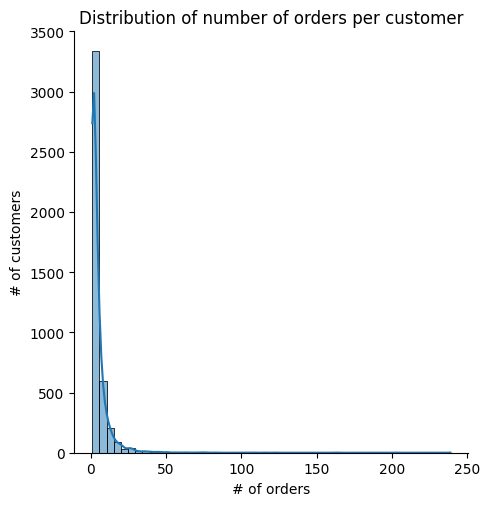

In [19]:
ax = sns.displot(grouped_multiple, kde=True, bins=50)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

CustomerID: 14911 made more number of purchases

In [20]:
#checking for number of customers who made purchases more than one
n_orders = data.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / data['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than one item.')

68.64% of customers ordered more than one item.


# Cohort analysis
Cohort analysis is a technique used in data analysis to study the behavior and characteristics of specific groups of individuals over time. It involves dividing a population into distinct groups, or cohorts, based on a shared characteristic or event and analyzing their behavior or outcomes.
Data Modeling :

* Build a RFM (Recency Frequency Monetary) model. `Recency` means the number of days since a customer made the last purchase. 
`Frequency` is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. `Monetary` is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

* Calculate RFM metrics.
Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

1. Combine three ratings to get a RFM segment (as strings).

2. Get the RFM score by adding up the three ratings.

3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money



In [21]:
#Number of unique customers in each month
data['cohort_month'] = pd.to_datetime(data['InvoiceDate']).dt.to_period('M')
month_cohort = data.groupby('cohort_month')['CustomerID'].nunique()
month_cohort

cohort_month
2010-12     929
2011-01     772
2011-02     776
2011-03    1005
2011-04     887
2011-05    1064
2011-06    1031
2011-07     973
2011-08     962
2011-09    1273
2011-10    1411
2011-11    1698
2011-12     663
Freq: M, Name: CustomerID, dtype: int64

Number of customers are highest in months of September, October and November

Text(0.5, 1.0, 'No. of active customers in each month')

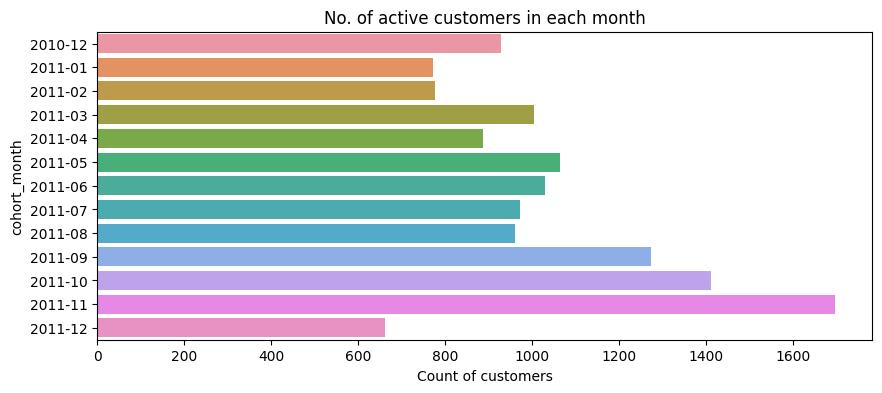

In [22]:
#plotting unique customers in each month
plt.figure(figsize=(10,4))
sns.barplot(y = month_cohort.index, x = month_cohort.values);
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")

#Retention rate
 The retention rate measures the percentage of customers from a specific cohort who continue to interact or make purchases in subsequent periods. You can calculate the retention rate by dividing the number of retained customers in each period by the initial cohort size.

In [23]:
# Now we analyze the retention rate of the customer.
# formula : current month total customers - previous month total number of customers
month_cohort - month_cohort.shift(1)

cohort_month
2010-12       NaN
2011-01    -157.0
2011-02       4.0
2011-03     229.0
2011-04    -118.0
2011-05     177.0
2011-06     -33.0
2011-07     -58.0
2011-08     -11.0
2011-09     311.0
2011-10     138.0
2011-11     287.0
2011-12   -1035.0
Freq: M, Name: CustomerID, dtype: float64

In [24]:
#pct_change() function to calculate the percentage change between consecutive periods. 
# The periods=1 parameter indicates that we want to calculate the percentage change between 
# the current period and the previous period.
retention_rate = round(month_cohort.pct_change(periods=1)*100,2)
retention_rate

cohort_month
2010-12      NaN
2011-01   -16.90
2011-02     0.52
2011-03    29.51
2011-04   -11.74
2011-05    19.95
2011-06    -3.10
2011-07    -5.63
2011-08    -1.13
2011-09    32.33
2011-10    10.84
2011-11    20.34
2011-12   -60.95
Freq: M, Name: CustomerID, dtype: float64


> Maximum retention is in the month of September followed by March, November, While worst in December



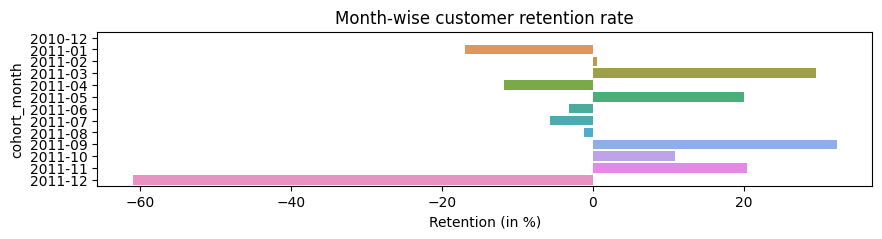

In [25]:
#ploting monthly nretention rates
plt.figure(figsize=(10,2))
sns.barplot(y = retention_rate.index, x = retention_rate.values);
plt.xlabel("Retention (in %)")
plt.title("Month-wise customer retention rate");

# Data Modeling :

Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

In [26]:
#calculating total price
data['Total_Price'] = data['Quantity'] * data['UnitPrice']

In [27]:
# We will make the refrence date +1 because we will get the transaction done on the last date.
from datetime import timedelta
current_date = data['InvoiceDate'].max()+timedelta(days=1)
print("considering current date as = " ,current_date)

considering current date as =  2011-12-10 12:50:00


In [28]:
#calculating recency, frequency and monetary value
#recency        = How many days have passed since the last purchase? 
#frequency      = How many transactions did a customer do? 
#monetary_Value = How much money did the customer spend? 

#empty dataframe
RFM = pd.DataFrame()

#calculating recency
RFM['Recency'] = data.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (current_date-x.max()).days,})

#calculating frequency
RFM['Frequency'] = data.groupby(['CustomerID'])['InvoiceNo'].nunique()

#calclulting monetary value
RFM['MonetaryValue'] = data.groupby(['CustomerID'])['Total_Price'].sum()

RFM

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,7,3124.96
12348.0,75,4,1009.88
12349.0,19,1,1344.17
12350.0,310,1,213.30
...,...,...,...
18280.0,278,1,91.70
18281.0,181,1,59.28
18282.0,8,3,118.16


In [29]:
#descriptive stats of RFM
RFM.describe()

,Recency,Frequency,MonetaryValue
count,4353.000000,4353.000000,4353.000000
mean,92.661613,4.819665,1325.708170
std,101.149638,8.760858,5550.920007
min,1.000000,1.000000,-4287.630000
25%,17.000000,1.000000,200.770000
50%,50.000000,2.000000,457.100000
75%,144.000000,5.000000,1136.800000
max,374.000000,239.000000,190309.320000


> *   `Recency` : Maximum number of days since a customer made a purchase is 374 days while minimum is 1 day.
*   `Frequency` : Maximum number of purchases made by a customer is 239 times while minimum is 1.
* `Monetary` : Maximum amount a customer spent is 1,90,309 while minimum is -4287(negative indicates return)



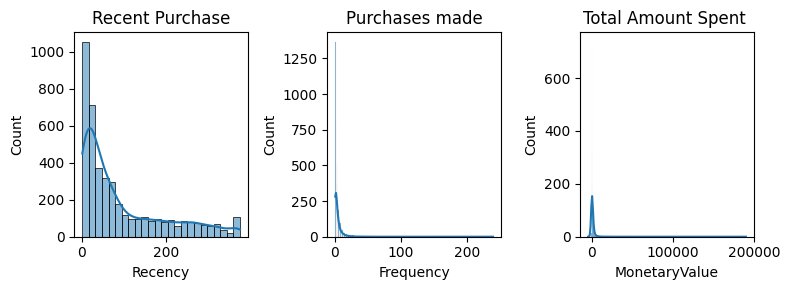

In [31]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

# Plot on the first subplot:recency
sns.histplot(RFM['Recency'], kde=True, ax=axes[0])
axes[0].set_title('Recent Purchase')

# Plot on the second subplot:frequency
sns.histplot(RFM['Frequency'], kde=True, ax=axes[1])
axes[1].set_title('Purchases made')

# Plot on the third subplot:monetary
sns.histplot(RFM['MonetaryValue'], kde=True, ax=axes[2])
axes[2].set_title('Total Amount Spent ')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

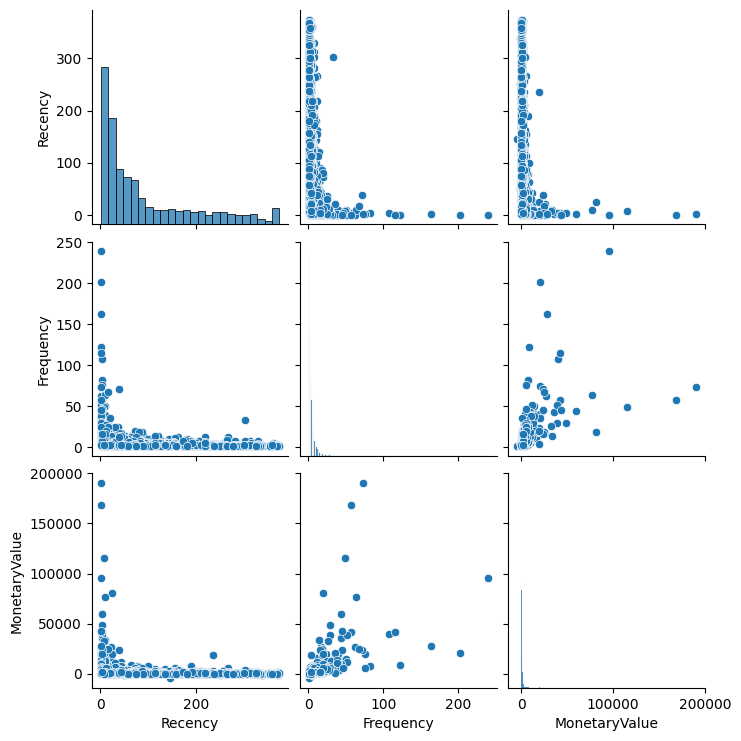

In [32]:
#Plot pairwise relationships in a RFM dataset.
sns.pairplot(data = RFM,kind="scatter")

# Bucketing Recency, Frequency and Monetary value :

In [33]:
#quantile: value below which a certain percentage of the data falls
quantiles = RFM.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 144.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'MonetaryValue': {0.25: 200.76999999999998, 0.5: 457.1, 0.75: 1136.8}}

In [34]:
#Give recency, frequency, and monetary scores individually by dividing them into quartiles
# 1: VIP customer
# 2: IP customer
# 3: normal
# 4: low

##if recent purchase of customer is low we are giving a low value
def recencyscore(x,d,p):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

#for frequency and monetary if frequency and spent money is more we are giving low value   
def fmscore(x,d,p):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1    

In [35]:
#giving score to recency, frequency and monetary based on quantiles
RFM['r_quartile'] = RFM['Recency'].apply(recencyscore, args=(quantiles,'Recency',))
RFM['f_quartile'] = RFM['Frequency'].apply(fmscore, args=(quantiles,'Frequency',))
RFM['m_quartile'] = RFM['MonetaryValue'].apply(fmscore, args=(quantiles,'MonetaryValue',))

In [36]:
#calculating the RFM score
#low score indicates the most loyal customers
RFM['rfm_score'] = RFM['r_quartile'] + RFM['f_quartile'] + RFM['m_quartile']

In [37]:
RFM

,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile,rfm_score
CustomerID,,,,,,,
12346.0,326,2,0.00,4,3,4,11
12347.0,2,7,3124.96,1,1,1,3
12348.0,75,4,1009.88,3,2,2,7
12349.0,19,1,1344.17,2,4,1,7
12350.0,310,1,213.30,4,4,3,11
...,...,...,...,...,...,...,...
18280.0,278,1,91.70,4,4,4,12
18281.0,181,1,59.28,4,4,4,12
18282.0,8,3,118.16,1,2,4,7


<Axes: xlabel='rfm_score', ylabel='count'>

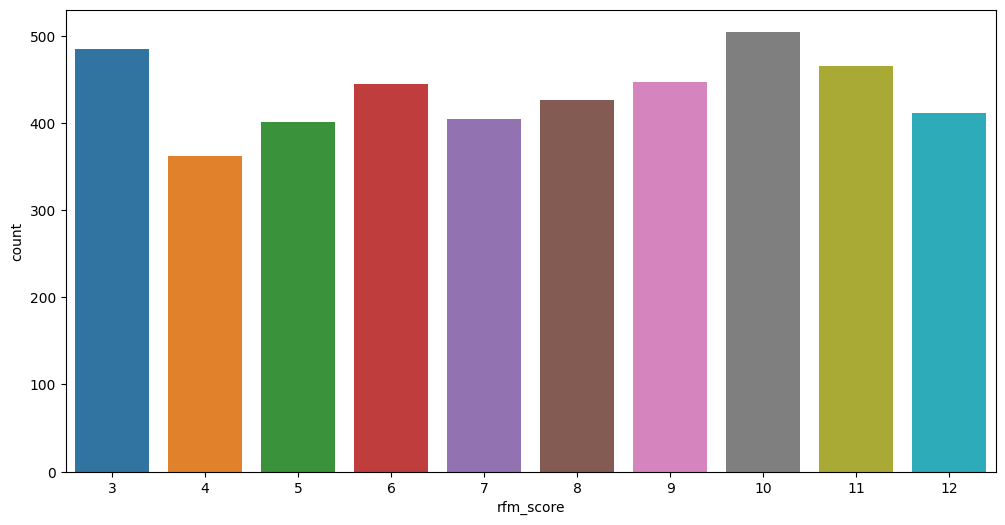

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(RFM, x='rfm_score')

In [40]:
# Now on the basis of the score we will make the segment.
def segment(df):
    if df['rfm_score']<=3:
        return "VIP"
    elif df['rfm_score']>3 and df['rfm_score']<=5:
        return "High_value"
    elif df['rfm_score']>5 and df['rfm_score']<=7:
        return "Potential"
    elif df['rfm_score']>7 and df['rfm_score']<=10:
        return "Needs_Attention"
    elif df['rfm_score']>9:
      return "Inactive"


In [41]:
RFM["rfm_segment"] = RFM.apply(segment, axis=1)

In [42]:
RFM

,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile,rfm_score,rfm_segment
CustomerID,,,,,,,,
12346.0,326,2,0.00,4,3,4,11,Inactive
12347.0,2,7,3124.96,1,1,1,3,VIP
12348.0,75,4,1009.88,3,2,2,7,Potential
12349.0,19,1,1344.17,2,4,1,7,Potential
12350.0,310,1,213.30,4,4,3,11,Inactive
...,...,...,...,...,...,...,...,...
18280.0,278,1,91.70,4,4,4,12,Inactive
18281.0,181,1,59.28,4,4,4,12,Inactive
18282.0,8,3,118.16,1,2,4,7,Potential


#Data Modeling :

Create clusters using k-means clustering algorithm.

* Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

* Decide the optimum number of clusters to be formed.

* Analyze these clusters and comment on the results.

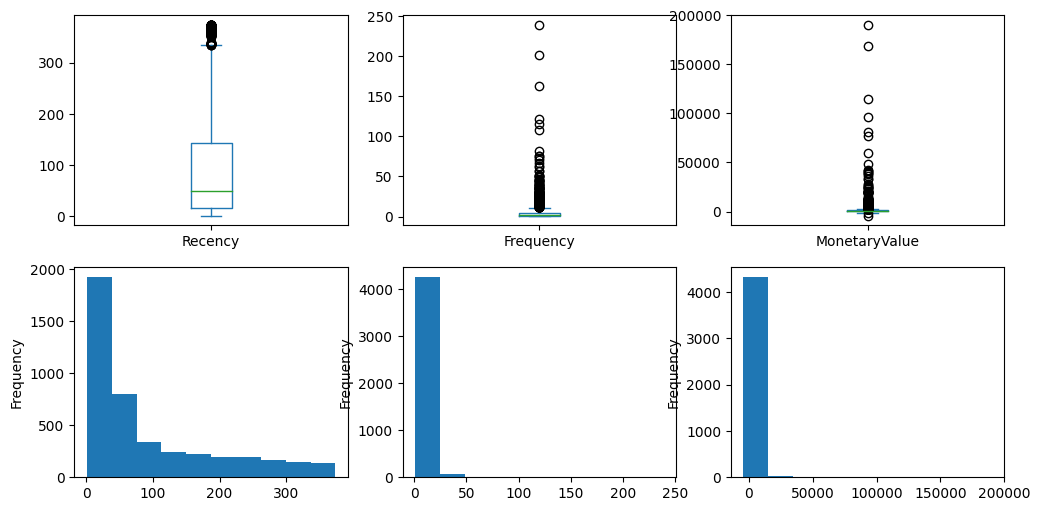

In [43]:
#plotting recency, frequency and monetaryValue 
plt.figure(figsize=(12,6))
for i, feature in enumerate(['Recency', 'Frequency', 'MonetaryValue']):
    plt.subplot(2,3,i+1)
    RFM[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    RFM[feature].plot(kind='hist')

> From the above graph we can see there are lot of outliers present in 'Frequency' and 'MonetaryValue'.


*   Presence of outliers significantly affect the performance and accuracy of K-means clustering algorithm.
*   K-means is sensitive to outliers because it aims to minimize the sum of squared distances between data points and their cluster centroids.
* Removing the ouliers makes model perform better.





In [49]:
RFM.shape

(4353, 8)

In [48]:
#removing outliers in the data
#considering only the data where frequency < 500 and Monetarvalue<40000
RFM_clust = RFM[ (RFM['Frequency']<50) & (RFM['MonetaryValue']<40000) ]
RFM_clust.shape

(4328, 8)

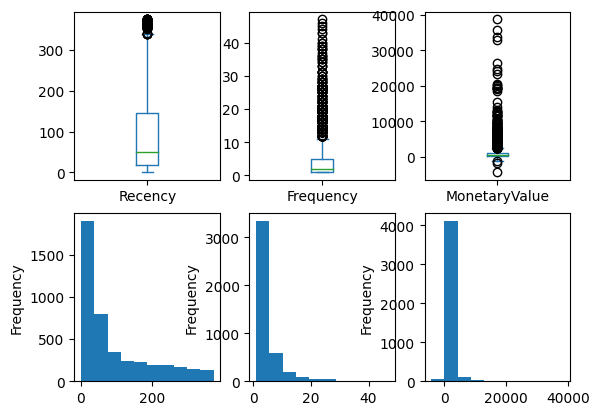

In [50]:
for i, feature in enumerate(['Recency', 'Frequency', 'MonetaryValue']):
    plt.subplot(2,3,i+1)
    RFM_clust[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    RFM_clust[feature].plot(kind='hist')

> From the above graphs, the data are highly skewed so use logarithmic or power transformations to compress the range of values and make them more evenly distributed.

In [51]:
#applying log transformation 
transform_rfm = pd.DataFrame()
transform_rfm["Recency"] = np.log(RFM_clust['Recency'])
transform_rfm["Frequency"] = np.log(RFM_clust['Frequency'])
transform_rfm["MonetaryValue"] = np.log(RFM_clust['MonetaryValue']-RFM_clust['MonetaryValue'].min()+1)

transform_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.786897,0.693147,8.363723
12347.0,0.693147,1.945910,8.911070
12348.0,4.317488,1.386294,8.575181
12349.0,2.944439,0.000000,8.636362
12350.0,5.736572,0.000000,8.412261


In [52]:
# Sandardizing the data
sc = StandardScaler()
scaled_rfm = sc.fit_transform(transform_rfm)
scaled_rfm = pd.DataFrame(scaled_rfm, columns = ["Recency", "Frequency", "MonetaryValue"])
scaled_rfm.head()

,Recency,Frequency,MonetaryValue
0,1.400941,-0.354606,-0.675393
1,-2.118074,1.024261,1.376553
2,0.385800,0.408313,0.117341
3,-0.562770,-1.117526,0.346702
4,1.366174,-1.117526,-0.493426


#Build K-means clustering

K-means clustering is a popular unsupervised machine learning algorithm used for grouping or clustering data points into distinct clusters based on their similarities. It aims to partition the data into K clusters, where K is a user-defined parameter.

The algorithm works as follows:

1. Initialization: Randomly select K initial cluster centers or centroids.
2. Assignment: Assign each data point to the nearest centroid based on a distance metric, typically Euclidean distance.
3. Update: Update the centroids by calculating the mean of all data points assigned to each cluster.
4. Repeat steps 2 and 3 until convergence: Iterate the assignment and update steps until the centroids no longer change significantly or a maximum number of iterations is reached.
5. Final clustering: Once the algorithm converges, each data point belongs to one of the K clusters based on its nearest centroid.

# Methods to find optimal 'K' value :

> where 'K' represents number of clusters


1. Elbow Curve Method 
2. Silhouette Analysis 

[methods to find optimal k value ](https://aiaspirant.com/optimal-k-in-k-menas/)

#Elbow Curve Method:
In the elbow method, we plot mean distance and look for the elbow point where the rate of decrease shifts. For each k, calculate the total within-cluster sum of squares (WSS). This elbow point can be used to determine K.





> The idea here is to choose the value of k after which the inertia doesn’t decrease significantly anymore.









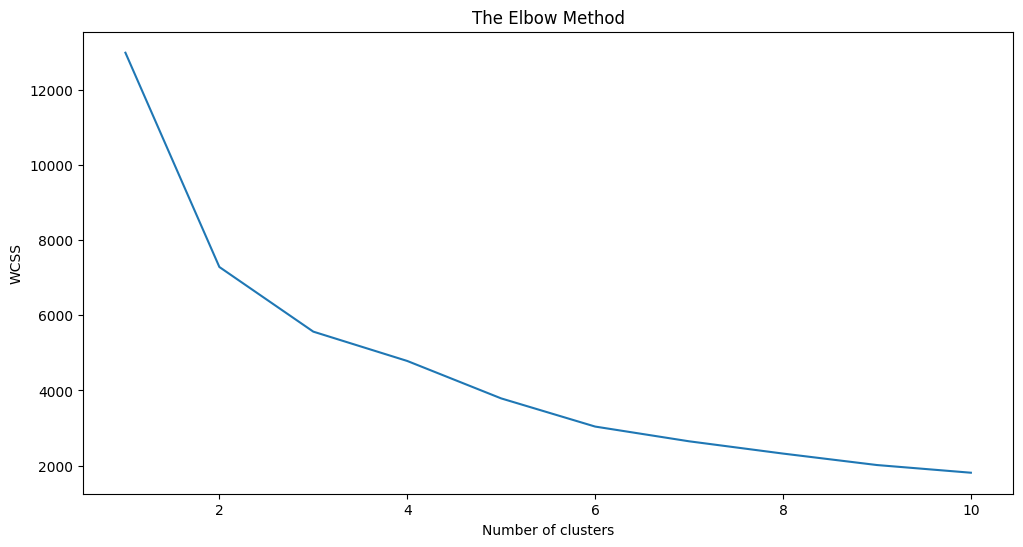

In [57]:
# Range of K values
k_values = range(1, 11)

#within cluster sum_of_squares
wcss = []

# Compute WCSS for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=50)
    kmeans.fit(scaled_rfm)
    wcss.append(kmeans.inertia_)

#elbow curve
plt.figure(figsize=(12,6))

plt.plot(k_values, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [58]:
# Creating dataframe for exporting to create visualization in tableau later
df_inertia = pd.DataFrame(list(zip(k_values, wcss)), columns=['clusters', 'intertia'])
df_inertia

,clusters,intertia
0,1,12984.000000
1,2,7284.232135
2,3,5564.295965
3,4,4784.285013
4,5,3788.362355
5,6,3039.222870
6,7,2647.388228
7,8,2320.790160
8,9,2015.813597
9,10,1811.368932



#Silhouette Analysis : 
The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 

> COHESION: It measures how similar observation is to the assigned cluster. It is measured by the within-cluster sum of squares(WSS).

> SEPARATION: It measures how dissimilar an observation is to the observation of nearby cluster. In simple words, it measures how well a cluster is separated from other clusters.It is measured by between cluster sum of squares(BSS).

>The silhouette score ranges from -1 to 1.  The better it is if the score is near to 1.


For n_clusters=2, the silhouette score is 0.4415832863014358
For n_clusters=3, the silhouette score is 0.3881208493293882
For n_clusters=4, the silhouette score is 0.3629019183297329
For n_clusters=5, the silhouette score is 0.36593600697452855
For n_clusters=6, the silhouette score is 0.3565538856419952
For n_clusters=7, the silhouette score is 0.34071823060618134
For n_clusters=8, the silhouette score is 0.35514298261315536
For n_clusters=9, the silhouette score is 0.35620333453944103
For n_clusters=10, the silhouette score is 0.3535030046065566


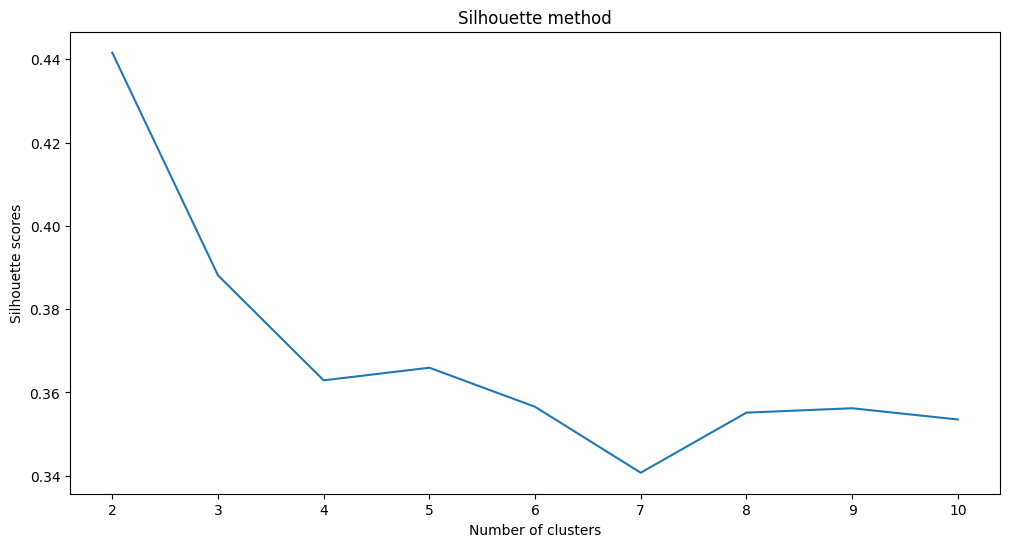

In [59]:
# Finding the Optimal Number of Clusters with the help of Silhouette Analysis
from sklearn.metrics import silhouette_score

#defining a range of clusters
k_range = range(2,11)

#to store silhouette scores
silhouette_avg = []

#calculating scores
for k in k_range:
  kmeans = KMeans(n_clusters=k,n_init='auto',random_state=42)
  cluster_labels = kmeans.fit_predict(scaled_rfm)
  score = silhouette_score(X=scaled_rfm, labels=cluster_labels, metric='euclidean')
  print("For n_clusters={0}, the silhouette score is {1}".format(k, score))
  silhouette_avg.append(score)

#plot
plt.figure(figsize=(12,6))

plt.plot(k_range, silhouette_avg)
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette scores')
plt.show()



> We are considering the optimal value of K=2

In [72]:
#apply K-means with k=2
final_ = KMeans(n_clusters=2,n_init='auto',max_iter=100)
final_.fit(scaled_rfm)

KMeans(max_iter=100, n_clusters=2, n_init='auto')

In [73]:
#getting labels
scaled_rfm['labeled'] = final_.labels_
scaled_rfm

,Recency,Frequency,MonetaryValue,labeled
0,1.400941,-0.354606,-0.675393,0
1,-2.118074,1.024261,1.376553,1
2,0.385800,0.408313,0.117341,0
3,-0.562770,-1.117526,0.346702,0
4,1.366174,-1.117526,-0.493426,0
...,...,...,...,...
4323,1.290905,-1.117526,-0.596079,0
4324,0.994445,-1.117526,-0.623929,0
4325,-1.160353,0.091673,-0.573501,1
4326,-1.639213,1.934153,0.416673,1


Text(0.5, 1.0, 'Recency vs Labels')

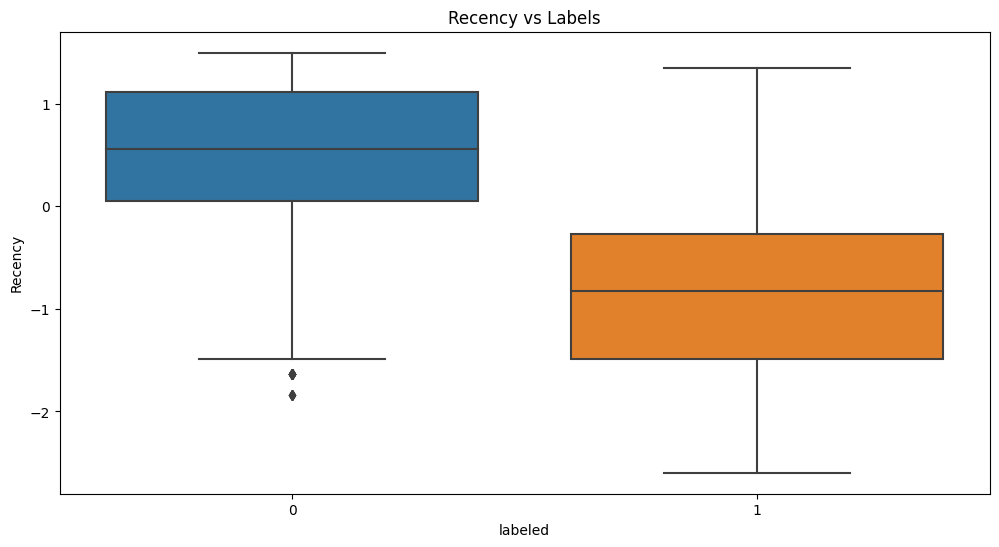

In [74]:
# Box plot to visualize Label vs Recency
plt.figure(figsize=(12,6))

sns.boxplot(x='labeled', y='Recency', data=scaled_rfm);
plt.title('Recency vs Labels')

Text(0.5, 1.0, 'Frequency vs Labels')

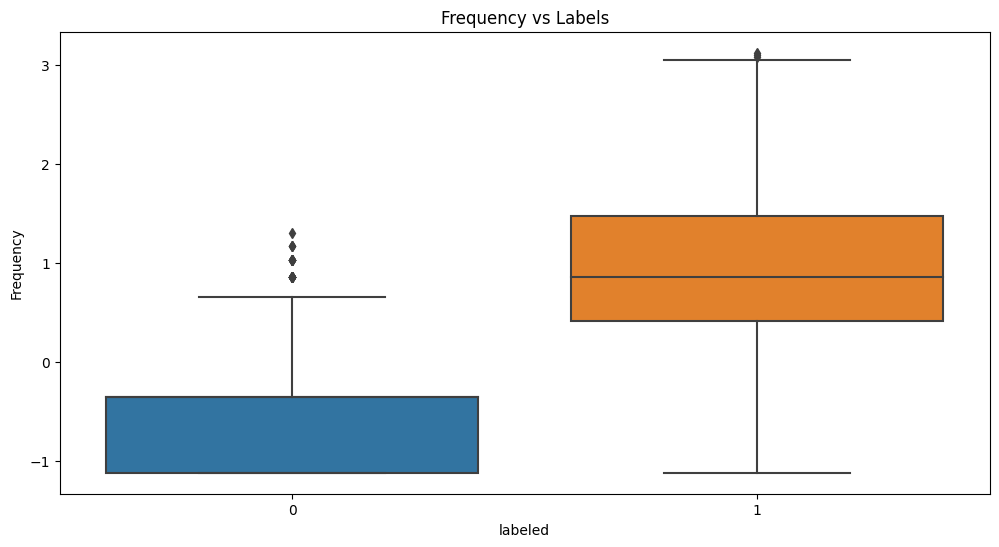

In [75]:
# Box plot to visualize Cluster Id vs Monetary
plt.figure(figsize=(12,6))

sns.boxplot(x='labeled', y='Frequency', data=scaled_rfm);
plt.title("Frequency vs Labels")

Text(0.5, 1.0, 'Label vs Monetary_Value')

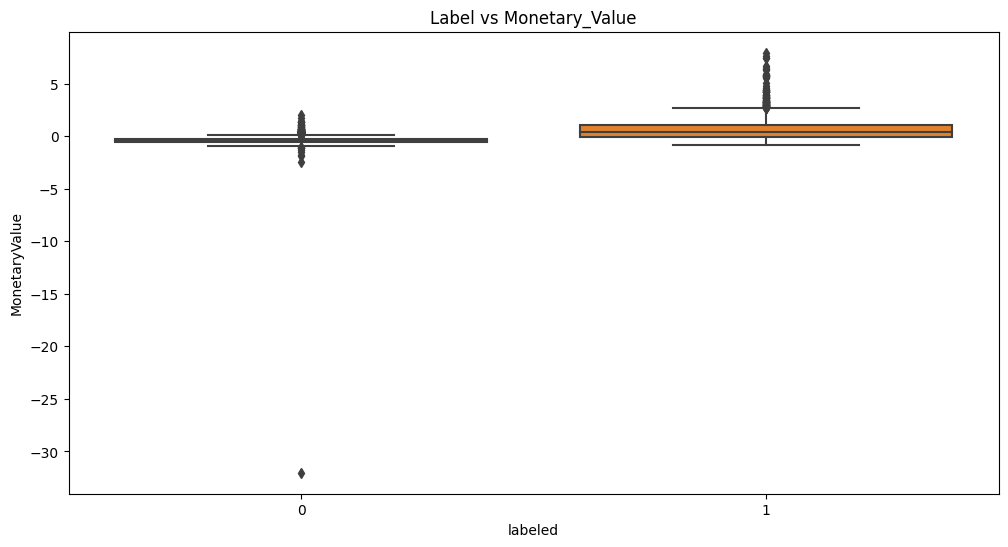

In [76]:
# Box plot to visualize Cluster Id vs Monetary
plt.figure(figsize=(12,6))

sns.boxplot(x='labeled', y='MonetaryValue', data=scaled_rfm);
plt.title("Label vs Monetary_Value")

<Figure size 1200x600 with 0 Axes>

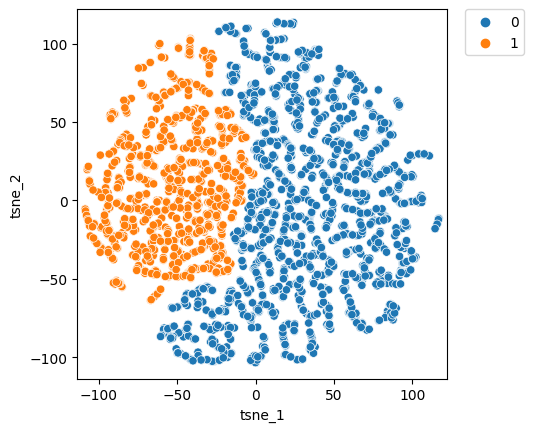

In [78]:
#to visualize high-dimensional data.
embedded = TSNE(n_components=2, 
                learning_rate='auto',
                init='pca', 
                perplexity=5).fit_transform(scaled_rfm)
embedded.shape

#plot
plt.figure(figsize=(12,6))
tsne_result_df = pd.DataFrame({'tsne_1': embedded[:,0], 'tsne_2': embedded[:,1], 'label': scaled_rfm['labeled']})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax)
lim = (embedded.min()-5, embedded.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Result:

> The Cluster_label = 1,are high potential buyers with low recency and high frequency and high Monetary value.

>The Cluster_label = 0, are lost customers with high recency and low frequency and low monetary value which needs more attention

In [81]:
# Converting the data frame into the excel to make dashboard in the tableau 
writer = pd.ExcelWriter(path="C:\\Users\\Sun Networks\\Desktop\\data science\\appliedai\\Customer_Segmentation\\output.xlsx")

data.to_excel(writer, sheet_name='master_data', index=False)
scaled_rfm.to_excel(writer, sheet_name='rfm_data', index=False)
df_inertia.to_excel(writer, sheet_name='inertia', index=False)

writer.save()



<ipython-input-81-5a5881384bfc>:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
